# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-09 11:38:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.5MB/s    in 5.5s    

2022-12-09 11:38:59 (18.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls -lh pizza_steak/

total 8.0K
drwxr-xr-x 4 root root 4.0K Dec  9 09:12 test
drwxr-xr-x 4 root root 4.0K Dec  9 09:12 train


In [3]:
!ls -lh pizza_steak/train/

total 44K
drwxr-xr-x 2 root root 20K Dec  9 09:12 pizza
drwxr-xr-x 2 root root 20K Dec  9 09:12 steak


In [4]:
!ls -lh pizza_steak/train/pizza/

total 43M
-rw-r--r-- 1 root root  45K Dec  9 09:12 1008104.jpg
-rw-r--r-- 1 root root  54K Dec  9 09:12 1008144.jpg
-rw-r--r-- 1 root root  47K Dec  9 09:12 1008844.jpg
-rw-r--r-- 1 root root  44K Dec  9 09:12 1008941.jpg
-rw-r--r-- 1 root root 117K Dec  9 09:12 1011404.jpg
-rw-r--r-- 1 root root  52K Dec  9 09:12 102037.jpg
-rw-r--r-- 1 root root  47K Dec  9 09:12 1026922.jpg
-rw-r--r-- 1 root root  75K Dec  9 09:12 1029698.jpg
-rw-r--r-- 1 root root  57K Dec  9 09:12 1033251.jpg
-rw-r--r-- 1 root root  63K Dec  9 09:12 1035854.jpg
-rw-r--r-- 1 root root  35K Dec  9 09:12 1038357.jpg
-rw-r--r-- 1 root root  51K Dec  9 09:12 1040878.jpg
-rw-r--r-- 1 root root  48K Dec  9 09:12 1044524.jpg
-rw-r--r-- 1 root root  63K Dec  9 09:12 1044789.jpg
-rw-r--r-- 1 root root  41K Dec  9 09:12 1047561.jpg
-rw-r--r-- 1 root root  38K Dec  9 09:12 1048649.jpg
-rw-r--r-- 1 root root  27K Dec  9 09:12 1054420.jpg
-rw-r--r-- 1 root root  52K Dec  9 09:12 1055065.jpg
-rw-r--r-- 1 root root  53K Dec  9 09

In [9]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("./pizza_steak/"):
  print(f"There are {len(filenames)} images and {len(dirnames)} folder(s) in {dirpath} ")

There are 0 images and 2 folder(s) in ./pizza_steak/ 
There are 0 images and 2 folder(s) in ./pizza_steak/train 
There are 750 images and 0 folder(s) in ./pizza_steak/train/steak 
There are 750 images and 0 folder(s) in ./pizza_steak/train/pizza 
There are 0 images and 2 folder(s) in ./pizza_steak/test 
There are 250 images and 0 folder(s) in ./pizza_steak/test/steak 
There are 250 images and 0 folder(s) in ./pizza_steak/test/pizza 


In [11]:
# Another way to find out how many images are in a file
len(os.listdir("./pizza_steak/train/steak"))

750

In [12]:
# Get the class names (programmatically, this is much more 
# helpful with a longer list of classes)
import pathlib
import numpy as np

def get_labels_list(fp):
  data_dir = pathlib.Path(fp) # turn actual path to python path
  # created a list of class_names from the subdirectories
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
  return class_names

In [13]:
fp = "./pizza_steak/train/"
get_labels_list(fp)

array(['pizza', 'steak'], dtype='<U5')

In [22]:
# view an Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


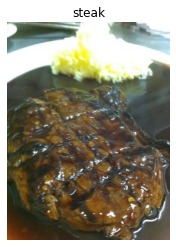

Image shape: (512, 382, 3)


In [23]:
img = view_random_image(
    target_dir="./pizza_steak/train/",
    target_class="steak"
)

In [24]:
img

array([[[146, 153, 112],
        [151, 158, 117],
        [158, 164, 126],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[141, 147, 109],
        [146, 152, 114],
        [154, 160, 124],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[143, 149, 113],
        [150, 156, 120],
        [159, 165, 131],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[153,  85,  12],
        [151,  83,  12],
        [147,  79,   8],
        ...,
        [125,  98,  89],
        [127,  98,  90],
        [128,  98,  88]],

       [[151,  85,  11],
        [151,  85,  11],
        [149,  82,  11],
        ...,
        [124,  97,  86],
        [127,  99,  87],
        [129,  99,  88]],

       [[150,  84,  10],
        [152,  86,  12],
        [152,  85,  14],
        ...,
        [123,  97,  84],
        [125,  97,  83],
        [127,  98,  84]]

In [25]:
img.shape

(512, 382, 3)

In [26]:
img / 255

array([[[0.57254902, 0.6       , 0.43921569],
        [0.59215686, 0.61960784, 0.45882353],
        [0.61960784, 0.64313725, 0.49411765],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.55294118, 0.57647059, 0.42745098],
        [0.57254902, 0.59607843, 0.44705882],
        [0.60392157, 0.62745098, 0.48627451],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.56078431, 0.58431373, 0.44313725],
        [0.58823529, 0.61176471, 0.47058824],
        [0.62352941, 0.64705882, 0.51372549],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.6       , 0.33333333, 0.04705882],
        [0.59215686, 0.3254902 , 0.04705882],
        [0.57647059, 0

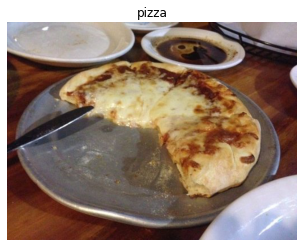

Image shape: (384, 512, 3)


In [29]:
pizza_img = view_random_image(
    target_dir="./pizza_steak/train/",
    target_class="pizza"
)

In [31]:
import tensorflow as tf


tf.constant(pizza_img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[161, 169, 188],
        [158, 169, 189],
        [158, 169, 189],
        ...,
        [173, 166, 174],
        [172, 165, 173],
        [170, 163, 171]],

       [[160, 168, 189],
        [163, 171, 192],
        [166, 177, 197],
        ...,
        [171, 164, 172],
        [172, 165, 173],
        [173, 166, 174]],

       [[163, 171, 192],
        [169, 177, 198],
        [174, 185, 207],
        ...,
        [170, 160, 169],
        [173, 163, 172],
        [177, 167, 176]],

       ...,

       [[130,  60,  26],
        [131,  61,  27],
        [133,  63,  29],
        ...,
        [129, 135, 171],
        [126, 130, 168],
        [124, 128, 166]],

       [[130,  60,  26],
        [131,  61,  27],
        [131,  61,  27],
        ...,
        [132, 138, 174],
        [132, 136, 174],
        [132, 136, 174]],

       [[131,  61,  27],
        [131,  61,  27],
        [130,  60,  26],
        ...,
        [126, 132, 16

## An end-to-end example

Let's build a CNN to find patterns in our images, more sepecifically we need to:
- load our images
- preprocess our images
- build a CNN to find patterns in our images
- compile the CNN
- fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5765 - accuracy: 0.7027 - val_loss: 0.5108 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4200 - accuracy: 0.8120 - val_loss: 0.3351 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3811 - accuracy: 0.8367 - val_loss: 0.3254 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3564 - accuracy: 0.8467 - val_loss: 0.3729 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3166 - accuracy: 0.8720 - val_loss: 0.2964 - val_accuracy: 0.8760


In [12]:
import pandas as pd


df_model1 = pd.DataFrame(history_1.history)
df_model1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.576549,0.702667,0.510802,0.722
1,0.420044,0.812000,0.335079,0.858
2,0.381135,0.836667,0.325441,0.868
3,0.356395,0.846667,0.372872,0.836
4,0.316640,0.872000,0.296374,0.876


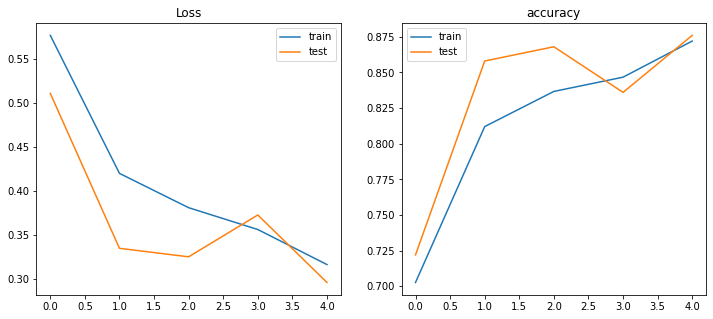

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(df_model1)), df_model1.loss, label="train")
plt.plot(range(len(df_model1)), df_model1.val_loss, label="test")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(len(df_model1)), df_model1.accuracy, label="train")
plt.plot(range(len(df_model1)), df_model1.val_accuracy, label="test")
plt.title("accuracy")
plt.legend()
plt.show()